### <h3 style="background-color:#6c757d;color:Red;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Innomatics Internship Task </centre></strong></h3>

### <h3 style="background-color:#6c757d;color:Blue;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Task 2 Classification Algorithm </centre></strong></h3>

In [ ]:
# Step 1

# Importing the required libraries

import random
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report

from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from sklearn.model_selection import GridSearchCV


# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [ ]:
# Step 2 - Downloading the dataset

# # Use this code to download the dataset for the first time
# # You will be required to install wget using pip
# # For Linux users checkout the alternative for 'del'

!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
# !del cifar-10-python.tar.gz

'wget' is not recognized as an internal or external command,
operable program or batch file.
x cifar-10-batches-py/
x cifar-10-batches-py/data_batch_4
x cifar-10-batches-py/readme.html
x cifar-10-batches-py/test_batch
x cifar-10-batches-py/data_batch_3
x cifar-10-batches-py/batches.meta
x cifar-10-batches-py/data_batch_2
x cifar-10-batches-py/data_batch_5
x cifar-10-batches-py/data_batch_1


In [ ]:
# Step 3 Loading the dataset

# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))


def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y


def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)


Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


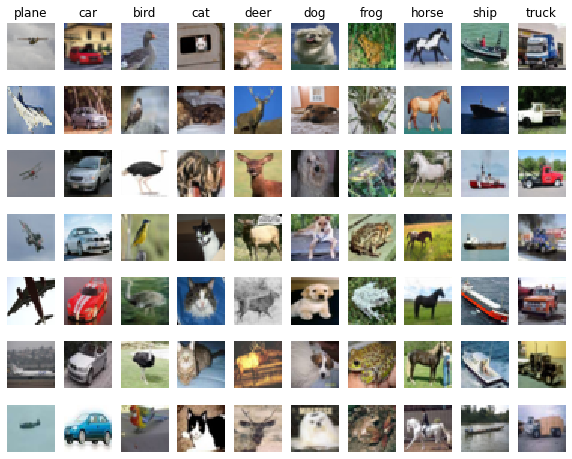

In [ ]:
# Step 4 - Visualization

# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [ ]:
# Step 5 - Flatten the Images

# Subsample the data for more efficient code execution in this exercise
try:
    del X_train, y_train, X_val
    del X_test, y_test,y_val
    print('Clear previously loaded data.')
except:
    pass
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

num_training=15000
val=1000
mask = range(num_training, num_training + val)
X_val = X_train[mask]
y_val = y_train[(mask)]
y_val = np.ravel(y_val)

mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]
y_train = np.ravel(y_train)

num_test = 5000
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]
y_test = np.ravel(y_test)


# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))

print('X_train and X_test shapes: ',X_train.shape, X_test.shape)
print('y_train and y_test shapes: ',y_train.shape, y_test.shape)
print('X_val and y_val shapes: ' ,X_val.shape, y_val.shape)

X_train and X_test shapes:  (15000, 3072) (5000, 3072)
y_train and y_test shapes:  (15000,) (5000,)
X_val and y_val shapes:  (1000, 3072) (1000,)


### Step 6

### *The intuition behind KNN algorithm*
The K-NN working can be explained on the basis of the below algorithm:

**Step-1**: Select the number K nearest neighborhood.

**Step-2**: Calculate the Euclidean distance of K number of neighbors to the given datapoint.

**Step-3**: Take the K nearest neighbors as per the calculated Euclidean distance to the given point.

**Step-4**: Among these k neighbors, count the number of the data points in each category.

**Step-5**: Assign the new data points to that category for which the number of the neighbor is maximum.

**Pros**

* It is simple to implement.

* It is robust to the noisy training data.

**Cons**

* The computation cost is expensive, because of calculating the distance between the data points for all the training samples.
* It is lazy algorithm as it doesnt learn from the training data and instead it stores the dataset.

In [ ]:
# Implementing the K-Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
import time
# Getting k from the user
k = int(input("Enter the value of k for k-Nearest Neighbor Classifier: "))
knn = KNeighborsClassifier(n_neighbors=k)   

tic = time.time()
knn.fit(X_train, y_train)
toc = time.time()
duration=toc-tic
print('Training duration is: ',duration)

start=time.time()
y_val_predict= knn.predict(X_val)
completed=time.time()
duration2=completed-start
print('Validation duration is:',duration2)

print("K- Neighbors Prediction")
print(classification_report(y_val, y_val_predict))

Training duration is:  0.0010142326354980469
Validation duration is: 1.9981622695922852
K- Neighbors Prediction
              precision    recall  f1-score   support

           0       0.33      0.56      0.42        89
           1       0.47      0.08      0.13       103
           2       0.22      0.49      0.30       106
           3       0.21      0.14      0.17       108
           4       0.21      0.42      0.28       103
           5       0.41      0.18      0.25        93
           6       0.23      0.19      0.21       111
           7       0.53      0.17      0.25       102
           8       0.39      0.56      0.46        91
           9       0.48      0.11      0.17        94

    accuracy                           0.28      1000
   macro avg       0.35      0.29      0.26      1000
weighted avg       0.34      0.28      0.26      1000



### Classification Report

**Precision** is defined as the ratio of true positives to the sum of true and false positives.

**Recall** is defined as the ratio of true positives to the sum of true positives and false negatives.

**F1_score** is the weighted harmonic mean of precision and recall.

**Support** is the number of actual occurrences of the class in the dataset.

From the classification report, it can be seen that the model has an average performance ranging from 30 to 50 for precision, recall, f1-score. Accuracy shows in value of 28%

In [ ]:
tic=time.time()
best_leaf = list(range(1,10))
best_neighbors = list(range(1,10))
p=[1,2]
#Convert to dictionary
parameter_tuning = dict(leaf_size=best_leaf, n_neighbors=best_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
knn_tuning = GridSearchCV(knn_2, parameter_tuning, cv=10)
#Fit the model
best_model = knn_tuning.fit(X_val,y_val)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
toc=time.time()
print(toc-tic)

Best leaf_size: 1
Best p: 1
Best n_neighbors: 7
275.84445428848267


In [ ]:
# After the above results we come to know that that the Best leaf_size=1, Best p is 1 and best n_neighbors is 7

from sklearn.neighbors import KNeighborsClassifier
import time

# Imputing the values of the above results to tune the model
knn = KNeighborsClassifier(n_neighbors=7,leaf_size=1,p=1)   

tic = time.time()
knn.fit(X_train, y_train)
toc = time.time()
duration=toc-tic
print('Training duration is: ',duration)

start=time.time()
y_val_predict= knn.predict(X_val)
completed=time.time()
duration2=completed-start
print('Validation duration is:',duration2)

print("K- Neighbors Prediction")
print(classification_report(y_val, y_val_predict))

Training duration is:  0.0010001659393310547
Validation duration is: 44.90646147727966
K- Neighbors Prediction
              precision    recall  f1-score   support

           0       0.35      0.58      0.44        89
           1       0.64      0.14      0.22       103
           2       0.23      0.51      0.32       106
           3       0.23      0.14      0.17       108
           4       0.20      0.40      0.27       103
           5       0.46      0.19      0.27        93
           6       0.26      0.23      0.24       111
           7       0.52      0.17      0.25       102
           8       0.41      0.60      0.49        91
           9       0.64      0.19      0.30        94

    accuracy                           0.31      1000
   macro avg       0.39      0.31      0.30      1000
weighted avg       0.39      0.31      0.29      1000



 We can clearly see the increase of accuracy from 28% to 31% after the hyper parameter tuning.

In [ ]:
# Testing the model with test dataset
st=time.time()
y_test_predict= knn.predict(X_test)
com=time.time()
print('Testing Duration is: ', com-st)
print(classification_report(y_test,y_test_predict))

Testing Duration is:  212.86113166809082
              precision    recall  f1-score   support

           0       0.33      0.56      0.41       488
           1       0.62      0.23      0.33       505
           2       0.22      0.46      0.29       512
           3       0.32      0.20      0.24       497
           4       0.23      0.42      0.30       507
           5       0.40      0.18      0.24       488
           6       0.30      0.27      0.28       491
           7       0.63      0.20      0.30       495
           8       0.45      0.64      0.53       504
           9       0.72      0.18      0.28       513

    accuracy                           0.33      5000
   macro avg       0.42      0.33      0.32      5000
weighted avg       0.42      0.33      0.32      5000



In [ ]:
# Accuracy of the K-Neighbors Algorithm
from sklearn.metrics import accuracy_score
print( "The accuracy of the knn model is: ",accuracy_score(y_test,y_test_predict))

The accuracy of the knn model is:  0.333


### *Intution behind SVM algorithm*

**SVM** algorithm helps to find the best line or decision boundary; this best boundary or region is called as a hyperplane.The distance between the vectors and the hyperplane is called as margin. And the goal of SVM is to maximize this margin.

**Hyperplane** It is use to find out the best decision boundary that helps to classify the data points.

**SuportVectors** the data points that are the closest to the hyperplane and which affect the position of the hyperplane are termed as Support Vector.

**Pros**

It works really well with a clear margin of separation.

It is effective in high dimensional spaces.

**Cons**

It doesn’t perform well when we have large data set because the required training time is higher.

It also doesn’t perform very well, when the data set has more noise

In [ ]:
# Implementing the Support Vector Classifier

from sklearn.svm import SVC
import time

clf = SVC()  

tic = time.time()
clf.fit(X_train, y_train)
toc = time.time()
duration=toc-tic
print('Training duration is: ',duration)

start=time.time()
y_val_predict= clf.predict(X_val)
completed=time.time()
duration2=completed-start
print('Validation duration is:',duration2)

print("SVC Prediction")
print(classification_report(y_val, y_val_predict))

Training duration is:  469.4680848121643
Validation duration is: 42.353277921676636
SVC Prediction
              precision    recall  f1-score   support

           0       0.56      0.51      0.53        89
           1       0.58      0.52      0.55       103
           2       0.34      0.39      0.36       106
           3       0.33      0.33      0.33       108
           4       0.38      0.36      0.37       103
           5       0.36      0.33      0.34        93
           6       0.39      0.41      0.40       111
           7       0.51      0.40      0.45       102
           8       0.59      0.60      0.60        91
           9       0.48      0.62      0.54        94

    accuracy                           0.44      1000
   macro avg       0.45      0.45      0.45      1000
weighted avg       0.45      0.44      0.44      1000



In [ ]:
# Getting the best parameters

tic=time.time()
## Creating a dictionary for parameter tuning
parameter_tuning = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}         
svc_2 = SVC()
# Using GridSearch
svc_tuning = GridSearchCV(svc_2, parameter_tuning)
# Fit the model
best_model = svc_tuning.fit(X_val,y_val)
# Print The value of best Hyperparameters
print('Best c(Regularization) value:', best_model.best_estimator_.get_params()['C'])
print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])
print('Best kernel:', best_model.best_estimator_.get_params()['kernel'])
toc=time.time()
print(toc-tic)

Best c(Regularization) value: 0.1
Best gamma: 1
Best kernel: poly
569.664674282074


After the above results of parameter tuning we get to know that c with 0.1 and gamma with 1 and kernel of poly gives the best results.

In [ ]:
# Imputing the best parameters from the above results

from sklearn.svm import SVC
import time

clf = SVC(C=0.1,gamma=1,kernel='poly')  

tic = time.time()
clf.fit(X_train, y_train)
toc = time.time()
duration=toc-tic
print('Training duration is: ',duration)

start=time.time()
y_val_predict= clf.predict(X_val)
completed=time.time()
duration2=completed-start
print('Validation duration is:',duration2)

print("SVC Prediction")
print(classification_report(y_val, y_val_predict))

Training duration is:  418.28598165512085
Validation duration is: 19.85469698905945
SVC Prediction
              precision    recall  f1-score   support

           0       0.48      0.53      0.50        89
           1       0.54      0.47      0.50       103
           2       0.24      0.29      0.26       106
           3       0.35      0.34      0.35       108
           4       0.39      0.46      0.42       103
           5       0.29      0.32      0.31        93
           6       0.44      0.32      0.37       111
           7       0.52      0.49      0.50       102
           8       0.55      0.55      0.55        91
           9       0.57      0.53      0.55        94

    accuracy                           0.42      1000
   macro avg       0.44      0.43      0.43      1000
weighted avg       0.43      0.42      0.43      1000



Observation:
We can clearly see the increase of f1_score after the hyper parameter tuning during validation this is the probable best tuning.

In [ ]:
## Testing the model with test dataset
st=time.time()
y_test_predicted= clf.predict(X_test)
com=time.time()
print('Testing Duration is: ', com-st)
print(classification_report(y_test,y_test_predicted))

Testing Duration is:  101.54640293121338
              precision    recall  f1-score   support

           0       0.47      0.51      0.49       488
           1       0.55      0.57      0.56       505
           2       0.32      0.38      0.35       512
           3       0.28      0.30      0.29       497
           4       0.39      0.39      0.39       507
           5       0.35      0.33      0.34       488
           6       0.46      0.41      0.43       491
           7       0.54      0.51      0.52       495
           8       0.60      0.62      0.61       504
           9       0.55      0.46      0.50       513

    accuracy                           0.45      5000
   macro avg       0.45      0.45      0.45      5000
weighted avg       0.45      0.45      0.45      5000



In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
print( "The accuracy of the svm model is: ",accuracy_score(y_test,y_test_predicted))

The accuracy of the svm model is:  0.4482


## *Intuition behind naive bayes*

**Bayes' theorem** is also known as Bayes' Rule or Bayes' law, which is used to determine the probability of a hypothesis with prior knowledge. It depends on the conditional probability.


Where,

**P(A|B) is Posterior probability**: Probability of hypothesis A on the observed event B.

**P(B|A) is Likelihood probability**: Probability of the evidence given that the probability of a hypothesis is true.

**P(A) is Prior Probability**: Probability of hypothesis before observing the evidence.

**P(B) is Marginal Probability**: Probability of Evidence.



**Pros**

* It performs well in Multi-class predictions as compared to the other Algorithms.
* It is the most popular choice for text classification problems.

**Cons**
* Naive Bayes assumes that all features are independent or unrelated, so it cannot learn the relationship between features.


In [ ]:
# Implementing the Naive-Bayes Classifier

from sklearn.naive_bayes import GaussianNB
import time

naive_bayes_clf=GaussianNB()

tic = time.time()
naive_bayes_clf.fit(X_train, y_train)
toc = time.time()
duration=toc-tic
print('Training duration is: ',duration)

start=time.time()
y_val_pre= naive_bayes_clf.predict(X_val)
completed=time.time()
duration2=completed-start
print('Validation duration is:',duration2)

print("NB Prediction")
print(classification_report(y_val, y_val_pre))

Training duration is:  0.8231143951416016
Validation duration is: 0.37549376487731934
NB Prediction
              precision    recall  f1-score   support

           0       0.29      0.51      0.37        89
           1       0.40      0.17      0.23       103
           2       0.19      0.07      0.10       106
           3       0.24      0.06      0.10       108
           4       0.23      0.38      0.28       103
           5       0.33      0.32      0.33        93
           6       0.20      0.40      0.26       111
           7       0.31      0.10      0.15       102
           8       0.41      0.46      0.44        91
           9       0.36      0.45      0.40        94

    accuracy                           0.28      1000
   macro avg       0.30      0.29      0.27      1000
weighted avg       0.29      0.28      0.26      1000



In [ ]:
# Getting the best parameters

tic=time.time()       
NB_2 = GaussianNB()
#Use GridSearch
NB_tuning = GridSearchCV(NB_2, params_NB)
#Fit the model
best_model = NB_tuning.fit(X_val,y_val)
#Print The value of best Hyperparameters
print('Best var_smoothing value:', best_model.best_estimator_.get_params()['var_smoothing'])
toc=time.time()
print(toc-tic)

Best var_smoothing value: 0.04328761281083057
51.75175070762634


In [ ]:
# Testing the model with the test data
NB_2 = GaussianNB(var_smoothing=0.04328761281083057)
NB_2.fit(X_train,y_train)
st=time.time()
y_test_predict= NB_2.predict(X_test)
com=time.time()
print('Testing Duration is: ', com-st)
print(classification_report(y_test,y_test_predict))

Testing Duration is:  1.699326753616333
              precision    recall  f1-score   support

           0       0.27      0.47      0.34       488
           1       0.41      0.13      0.20       505
           2       0.17      0.07      0.10       512
           3       0.25      0.04      0.07       497
           4       0.22      0.41      0.29       507
           5       0.30      0.24      0.27       488
           6       0.24      0.50      0.33       491
           7       0.37      0.12      0.18       495
           8       0.39      0.52      0.44       504
           9       0.41      0.42      0.41       513

    accuracy                           0.29      5000
   macro avg       0.30      0.29      0.26      5000
weighted avg       0.30      0.29      0.26      5000



In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test_predict, y_test, average='macro')

0.26272293068852826

 Step 7
#### The table representing the accuracies & F1 Score of the Classification Algorithms

Algorithm | Accuracy | F1_Score
:-|:-:|-:|
**KNN**|*31*|*30*|
**SVM**|*45*|*44*|
**NB**|*29*|*26*|